<a href="https://colab.research.google.com/github/mello-pedro/MCDE_23_24_PROJETOS/blob/main/tratamento_dados_projeto_final_COM_PBI_VF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projecto Final IADE - GRUPO 5

> Trata-se de proposta de resolução dos enunciados solicitados pelo professor em face do projecto final, que tem por objetivo tratar os dados de 3 ficheiros em excel e criar uma modelagem de dados que os relacione e crie, a partir da tabela facto unificada, tabelas dimensão relacionadas.<br>
<br>
> Optamos em um primeiro momento por tratar os dados apresentados junto aos enunciados com a utilização do Python/Pandas, e ainda utilizando o Microsoft Excel; <br>
<br>
> Os dados que serão carregados a seguir como tabelas facto já passaram por uma primeira etapa de validação no excel, tendo sido regularizada a questão relativa a cidades com nomes iguais em países diferentes e padronização da coluna Customer ID no formato 'AA-0000'.<br>
<br>
> A seguir, passamos a mais algumas transformações para só então inserir os dados no Power BI;

In [ ]:
import pandas as pd
import numpy as np

## Importando o primeiro dataset de fatos de vendas e pré-visualizando as entradas
vendas_19_20 = pd.read_excel("/Users/pedroxxxxxxxxxxx/Dataset_IADE_Orders19_20_revisado.xlsx")
vendas_19_20.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,49,MX-2020-127145,2020-04-10,2020-04-15,Standard Class,SF-10200,Sarah Foster,Consumer,São Benedito,Ceará,Brazil,NaN,LATAM,South,FUR-FU-10003608,2,0.000,7.48000,2.040,High
1,51,MX-2020-168662,2020-08-11,2020-08-16,Second Class,KC-16255,Karen Carlisle,Corporate,Toluca,México,Mexico,NaN,LATAM,North,OFF-SU-10003665,4,0.000,28.72000,3.356,Medium
2,52,US-2020-150987,2020-01-30,2020-02-03,Second Class,DW-13480,Dianna Wilson,Home Office,Tegucigalpa,Francisco Morazán,Honduras,NaN,LATAM,Central,TEC-CO-10003142,3,0.402,-85.64748,9.810,Medium


In [ ]:
## Como podemos ver abaixo, o primeiro dataset possui 10.025 linhas e 20 colunas
vendas_19_20.shape

(10025, 20)

In [ ]:
## Importando o segundo dataset de fatos de vendas e pré-visualizando as entradas
vendas_21_23 = pd.read_excel("/Users/pedroxxxxxxxxxxx/Dataset_IADE_Orders_21_23_revisado.xlsx")
vendas_21_23.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,4754,MX-2021-140354,2021-12-05,2021-12-11,Standard Class,AA-10315,Alex Avila,Consumer,Culiacán,Sinaloa,Mexico,NaN,LATAM,North,OFF-PA-10004501,5,0.0,12.20,3.256,Medium
1,11160,ES-2022-4276357,2022-09-26,2022-09-28,First Class,AA-10315,Alex Avila,Consumer,Manchester (England),England,United Kingdom,NaN,EU,North,OFF-AR-10004519,3,0.0,29.61,34.690,High
2,11427,ES-2023-5334183,2023-06-03,2023-06-06,Second Class,AA-10315,Alex Avila,Consumer,Garforth,England,United Kingdom,NaN,EU,North,OFF-AR-10002382,2,0.0,24.78,5.150,High


In [ ]:
## Como podemos ver abaixo, o segundo dataset possui 41.265 linhas e 20 colunas
vendas_21_23.shape

(41265, 20)

## CONCATENANDO OS DATASETS E REORGANIZANDO OS ÍNDICES

> De seguida, utilizaremos o método CONCAT do pandas para empilhar os dataframes e criar uma tabela facto única, conforme solicitado no enunciado; <br>
<br>
> Além disso, criaremos o mercado 'Iberian', compreendendo Portugal e Espanha; <br>
<br>
> Por conseguinte, verificaremos os valores nulos e os preencheremos; <br>

In [ ]:
## 1.Concatenando os datasets de vendas; 2.Ordenando pela data da venda; 3.reorganizando a coluna de índice
df = pd.concat([vendas_19_20, vendas_21_23]).reset_index(drop=True)
df = df.sort_values(by=['Order Date'], ascending=True)
df = df.reset_index().rename_axis('row_id', axis=1)
df.drop(columns=['Row ID', 'index'], inplace=True)

## 4.Criando o mercado Iberian por meio de um laço de repetição for
for index, row in df.iterrows():
    if row['Country'] == 'Portugal':
        df.loc[index, 'Market'] = 'Iberian'
    elif row['Country'] == 'Spain':
        df.loc[index, 'Market'] = 'Iberian'
    else:
        pass


In [ ]:
## Dando uma vista de olhos em alguns detalhes com o objeto info. Podemos verificar que o número de colunas e linhas do novo dataset
# equivale aos dois datasets de vendas someados. Além disso há uma coluna a menos, qual seja 'Row ID',
# que foi eliminada para reorganização do novo dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        51290 non-null  object        
 1   Order Date      51290 non-null  datetime64[ns]
 2   Ship Date       51290 non-null  datetime64[ns]
 3   Ship Mode       51290 non-null  object        
 4   Customer ID     51290 non-null  object        
 5   Customer Name   51290 non-null  object        
 6   Segment         51290 non-null  object        
 7   City            51290 non-null  object        
 8   State           51290 non-null  object        
 9   Country         51290 non-null  object        
 10  Postal Code     9994 non-null   float64       
 11  Market          51290 non-null  object        
 12  Region          51290 non-null  object        
 13  Product ID      51290 non-null  object        
 14  Quantity        51290 non-null  int64         
 15  Di

In [ ]:
##5. Preenchendo as entradas vazias de DF
df['Postal Code'] = df['Postal Code'].fillna(-1)
df['Customer Name'] = df['Customer Name'].fillna('UNKNOWN')
df['Order Priority'] = df['Order Priority'].fillna('UNKNOWN')

In [ ]:
## Confirmando se Portugal teve a coluna market transformada (e consequentemente Spain)
portugal = df.loc[df['Country'] == 'Portugal']
portugal.head(2)

row_id,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Quantity,Discount,Profit,Shipping Cost,Order Priority
371,IT-2019-4233239,2019-11-25,2019-11-29,Standard Class,AR-10405,Allen Rosenblatt,Corporate,Lisbon,Lisboa,Portugal,-1.0,Iberian,South,TEC-CO-10001926,3,0.5,-216.765,33.99,Medium
1527,IT-2020-1716540,2020-02-06,2020-02-08,Second Class,CS-12490,Cindy Schnelling,Corporate,Coimbra,Coimbra,Portugal,-1.0,Iberian,South,OFF-EN-10002013,2,0.5,-4.770,3.41,High


In [ ]:
#6. Função para corrigir os Product IDs de Tables, que não tabela Facto estavam incompletos (sem o prefixo FUR)
def corrigir_product_id(product_id):
    if product_id[0] == '-':
        return 'FUR-TA-' + product_id[4:]
    else:
        return product_id

# Aplica a função à coluna 'Product ID' e cria uma nova coluna 'Product ID Corrigido'
df['Product_ID_Corrigido'] = df['Product ID'].apply(corrigir_product_id)
df['Product ID'] = df['Product_ID_Corrigido']
df = df.drop(columns=['Product_ID_Corrigido'])

## Tratando a tabela dimensão de Productos

> Trataremos a partir de já a tabela dimensão de productos, pois é de suma importância que os dados de Product ID sejam atualizados em conformidade com o Product ID atualizado da tabela facto anterior.<br>
<br>
> Em um primeiro momento, verificaremos as entradas nulas deste dataset. A seguir, confirmaremos se somente existem entradas nulas na coluna 'Category' e se todas possuem o valor 'Tables' em sua 'Sub-Category'. Caso afirmativo, utilizaremos o método 'fillna' do pandas para preenches todos os nulos com 'Furniture', conforme o enunciado aponta.<br>
<br>
> Por fim, trataremos os Product IDs para que fiquem no padrão solicitado no enunciado. Ao longo da resuloção será possível perceber como identificamos a incoerência nos dados que levava produtos diferentes a terem o mesmo Product ID e como tratamos esses valores para afetar o menos possível o join das colunas à tabela facto.

In [ ]:
## 7.Carregando a tabela de produtos para realizar o join com vendas após análise e tratamento
dim_produtos = pd.read_excel("/Users/pedroxxxxxxxxxxx/Dataset_IADE_Products.xlsx")
dim_produtos.head()

,Product ID,Category,Sub-Category,Product Name,UnitPrice
0,FUR-ADV-10000002,Furniture,Furnishings,"Advantus Photo Frame, Duo Pack",53.04
1,FUR-ADV-10000108,Furniture,Furnishings,"Advantus Clock, Erganomic",50.01
2,FUR-ADV-10000183,Furniture,Furnishings,"Advantus Photo Frame, Black",52.98
3,FUR-ADV-10000188,Furniture,Furnishings,"Advantus Stacking Tray, Erganomic",24.99
4,FUR-ADV-10000190,Furniture,Furnishings,"Advantus Frame, Duo Pack",111.18


In [ ]:
## 8.Verificando entradas nulas (366 em 'Category')
nulos_produtos = dim_produtos.isnull().sum()
nulos_produtos

Product ID        0
Category        366
Sub-Category      0
Product Name      0
UnitPrice         0
dtype: int64

In [ ]:
# 9. Conferindo se todas as categorias com valores nulos possuem Tables em sub-category
# pd.set_option('display.max_rows', None)
tables_null = dim_produtos.loc[dim_produtos['Category'].isnull()]
tables_null.head()
## Todas as linhas com categoria null tem tables como Sub-Category.

,Product ID,Category,Sub-Category,Product Name,UnitPrice
24,FUR-BAR-10000560,NaN,Tables,"Barricks Round Table, with Bottom Storage",501.51
25,FUR-BAR-10000831,NaN,Tables,"Barricks Training Table, Fully Assembled",319.77
26,FUR-BAR-10000946,NaN,Tables,"Barricks Computer Table, with Bottom Storage",480.03
27,FUR-BAR-10001039,NaN,Tables,"Barricks Coffee Table, Fully Assembled",302.97
28,FUR-BAR-10002449,NaN,Tables,"Barricks Training Table, Adjustable Height",320.49


In [ ]:
# 10. Incluindo furniture nas categorias nulas, conforme enunciado
dim_produtos['Category'] = dim_produtos['Category'].fillna('Furniture')

In [ ]:
## Conferindo se funcionou corretamente:
tables_test = dim_produtos[dim_produtos['Sub-Category'] == 'Tables']
tables_test.head(3)

,Product ID,Category,Sub-Category,Product Name,UnitPrice
24,FUR-BAR-10000560,Furniture,Tables,"Barricks Round Table, with Bottom Storage",501.51
25,FUR-BAR-10000831,Furniture,Tables,"Barricks Training Table, Fully Assembled",319.77
26,FUR-BAR-10000946,Furniture,Tables,"Barricks Computer Table, with Bottom Storage",480.03


In [ ]:
## 11.Conferir se não existem ProductIDs duplicados antes de atualizá-los, evitando problemas no join mais à frente
## Como podemos ver, não existem ProductIDs iguais neste momento
linhas_duplicadas = dim_produtos[dim_produtos.duplicated(subset='Product ID')]
linhas_duplicadas.sum()

Product ID      0.0
Category        0.0
Sub-Category    0.0
Product Name    0.0
UnitPrice       0.0
dtype: float64

In [ ]:
## 12.Observe a linha 0: Se a tranformarmos para o formato de Product Id solicitado (3 primeiros caracteres da categoria
# em maiúsculo, um '-', 2 primeiros caracteres de Sub_category também em maiúsculas, outro '-' e o número)
# os Produtos da linha 0 do Dataframe de Produtos (Advantus Photo Frame, Duo Pack) e da linha 2205(Tenex Stacking Tray, Black),
# Ficarão com o mesmo Product ID após serem atualizados, sendo FUR-ADV-10000002. Isso acontecerá com diversos outros
# Produtos.
linhas_parecidas = dim_produtos[dim_produtos['Product Name'] == 'Advantus Photo Frame, Duo Pack']
linhas_parecidas.head()

,Product ID,Category,Sub-Category,Product Name,UnitPrice
0,FUR-ADV-10000002,Furniture,Furnishings,"Advantus Photo Frame, Duo Pack",53.04
1229,FUR-FU-10000980,Furniture,Furnishings,"Advantus Photo Frame, Duo Pack",53.04
1271,FUR-FU-10001366,Furniture,Furnishings,"Advantus Photo Frame, Duo Pack",53.04
1420,FUR-FU-10002784,Furniture,Furnishings,"Advantus Photo Frame, Duo Pack",35.36
1451,FUR-FU-10003052,Furniture,Furnishings,"Advantus Photo Frame, Duo Pack",53.04


In [ ]:
linhas_parecidas2 = dim_produtos[dim_produtos['Product Name'] == 'Tenex Stacking Tray, Black']
linhas_parecidas2.head()

,Product ID,Category,Sub-Category,Product Name,UnitPrice
1097,FUR-FU-10000012,Furniture,Furnishings,"Tenex Stacking Tray, Black",16.86
1393,FUR-FU-10002521,Furniture,Furnishings,"Tenex Stacking Tray, Black",25.29
2205,FUR-TEN-10000002,Furniture,Furnishings,"Tenex Stacking Tray, Black",25.29


In [ ]:
## Como isso está aparecendo no dataset das vendas? Resposta: Não temos nehuma info do produto além do Product ID,
# impossibilitando saber qual produto recebeu a classificação em comento.
linhas_parecidas_atualiz = df[df['Product ID'] == 'FUR-FU-10000002']
linhas_parecidas_atualiz.head(2)

row_id,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Quantity,Discount,Profit,Shipping Cost,Order Priority
17701,TU-2021-3220,2021-09-10,2021-09-15,Standard Class,NL-18310,Nancy Lomonaco,Home Office,Uskudar,Istanbul,Turkey,-1.0,EMEA,EMEA,FUR-FU-10000002,1,0.6,-11.634,0.23,Medium
33664,MZ-2022-7830,2022-10-29,2022-11-02,Standard Class,NM-18445,Nathan Mautz,Home Office,Matola,Maputo,Mozambique,-1.0,Africa,Africa,FUR-FU-10000002,2,0.0,7.080,8.39,High


In [ ]:
## 13. A saída: Eliminaremos as linhas de ProductID duplicados do dataset dimensão de Produtos, mantendo apenas
# a última ocorrência (decisão arbitrária)
dim_produtos = dim_produtos.drop_duplicates(subset=['Product ID'], keep='last')

In [ ]:
## Assim poderemos realizar o Join mais adiante, mesmo com os problemas apresentados acima.
## 14.Função para atualizar ProductID (para o padrão solicitado no enunciado)
def atualizar_product_id(row):
    partes = row['Product ID'].split('-')
    nova_parte = row['Sub-Category'][:2].upper()
    partes[1] = nova_parte
    novo_product_id = '-'.join(partes)
    return novo_product_id

dim_produtos['Product ID'] = dim_produtos.apply(atualizar_product_id, axis=1)

In [ ]:
## Preview da tabela dimensão de productos após as alterações:
dim_produtos.head()

,Product ID,Category,Sub-Category,Product Name,UnitPrice
0,FUR-FU-10000002,Furniture,Furnishings,"Advantus Photo Frame, Duo Pack",53.04
1,FUR-FU-10000108,Furniture,Furnishings,"Advantus Clock, Erganomic",50.01
2,FUR-FU-10000183,Furniture,Furnishings,"Advantus Photo Frame, Black",52.98
3,FUR-FU-10000188,Furniture,Furnishings,"Advantus Stacking Tray, Erganomic",24.99
4,FUR-FU-10000190,Furniture,Furnishings,"Advantus Frame, Duo Pack",111.18


In [ ]:
## 15. Salvar a tabela de productos atualizada em excel para uso posterior
dim_produtos.to_excel('/Users/pedroxxxxxxxxxxx/Products_ID_ATUALIZADO.xlsx', index=False)

In [ ]:
## 16.Join da tabela Produtos com a tabela de vendas principal para adicionar colunas e poder trabalhar valores
# por meio do preço unitário dos productos na tabela facto
df_final = pd.merge(df, dim_produtos, on='Product ID', how='left')

In [ ]:
## A nova tabela facto possui o mesmo número de linhas, com 4 colunas a mais advindas da tabela dimensão Productos
df_final.shape

(51290, 23)

In [ ]:
## Preview da tabela facto final, que salvaremos e trabalharemos no Power BI
df_final.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,...,Product ID,Quantity,Discount,Profit,Shipping Cost,Order Priority,Category,Sub-Category,Product Name,UnitPrice
0,AG-2019-2040,2019-10-31,2019-11-05,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,...,OFF-ST-10000025,2,0.0,106.140,35.46,Medium,Office Supplies,Storage,"Tenex Lockers, Blue",204.15
1,HU-2019-1220,2019-10-31,2019-11-04,Second Class,AT-10735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,...,OFF-ST-10001585,4,0.0,29.640,8.17,High,Office Supplies,Storage,"Tenex Box, Single Width",16.53
2,IN-2019-47883,2019-10-31,2019-11-07,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,...,OFF-SU-10000618,3,0.1,36.036,9.72,Medium,Office Supplies,Supplies,"Acme Trimmer, High Speed",44.58
3,IN-2019-47883,2019-10-31,2019-11-07,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,...,OFF-PA-10001968,2,0.1,15.342,1.80,Medium,Office Supplies,Paper,"Eaton Computer Printout Paper, 8.5 x 11",30.69
4,IN-2019-47883,2019-10-31,2019-11-07,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,...,FUR-FU-10003447,5,0.1,37.770,4.70,Medium,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",25.26


In [ ]:
## 17.Salvando a databela facto final para trabalho posterior no PowerBI e finalização do projecto
df_final.to_excel('/xxxxxxxxxxx/tabela_FACTO_ATUALIZADA_VF_16_11_23.xlsx', index=False)

## Criando e tratando as demais Tabelas Dimensão

> Neste momento passaremos aos tratamentos necessários para criar as tabelas dimensão, à exceção da DIM_PRODUCTS que já foi dada no enunciado e que tratamos anteriormente neste caderno.<br>
<br>
> Primeiro carregamos e tratamos novamente a Tabela Facto, uma vez que notamos um erro nos OrderIDs da tabela original(conforme visualizado abaixo. Pedidos diferentes, com ProductIDs diferentes, com o mesmo OrderID). Ora, sendo cada linha da tabela facto um pedido novo e, portanto, diferente, cada linha precisa ter seu OrderID único.<br>
<br>
> Como a coluna OrderID não tinha sido utilizada para nenhum relacionamento até então, trabalhamos e modificamos sua estrtura, mantendo os mesmos prefixos, mas gerando um número aleatório para cada linha com a ajuda da biblioteca Hash do Python.<br>
<br>
> De seguida, criamos a tabela DIM_LOCATION, conferindo um ID_Unico, chamado Locatio_id, para cada combinação diferente de City + State + Country existente na tabela Facto. <br>
<br>
> Repetimos o mesmo processo, desta vez para a coluna Market. Entretanto, por ser uma tabela pequena, definimos um Market_id ordinal comum.<br>
<br>
> Em relação à DIM_CUSTOMERS, extraímos Customer_ID (valores únicos), Customer Name e Segment da tabela Facto e utilizamos para a criação desta nova dimensão.<br>
<br>
> Por fim, utilizamos o método drop do pandas para Excluir da tabela Facto as colunas que já não nos eram mais necessárias pois já constavam às tabelas dimensão, evitando assim redundâncias, e salvamos todas em arquivos excel correspondentes para posterior carregamento no PowerBI, garantindo o relacionamento sem eqívocos na modelagem do POwerBI.

In [ ]:
## 1. Carregando a tabela Facto atualizada com o nome de 'ajustes', para ajustar Product ID
import pandas as pd
import hashlib

ajustes = pd.read_excel('/xxxxxxxxxxx/tabela_FACTO_ATUALIZADA_.xlsx')
ajustes = ajustes.sort_values(by=['Country'])
ajustes.head()


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Quantity,Discount,Profit,Shipping Cost,Order Priority,Category,Sub-Category,Product Name,UnitPrice
28652,IN-2022-43151,2022-07-17,2022-07-20,Second Class,SU-20665,Stephanie Ulpright,Home Office,Kabul,Kabul,Afghanistan,-1,APAC,Central Asia,TEC-AC-10002324,2,0.0,4.56,15.62,High,Technology,Accessories,"Belkin Keyboard, Bluetooth",83.88
36193,IN-2023-29767,2023-01-19,2023-01-26,Standard Class,CA-12055,Cathy Armstrong,Home Office,Herat,Hirat,Afghanistan,-1,APAC,Central Asia,TEC-MA-10001726,3,0.0,13.77,14.10,Medium,Technology,Machines,"Epson Receipt Printer, White",115.44
28651,IN-2022-43151,2022-07-17,2022-07-20,Second Class,SU-20665,Stephanie Ulpright,Home Office,Kabul,Kabul,Afghanistan,-1,APAC,Central Asia,OFF-FA-10003893,1,0.0,2.34,1.61,High,Office Supplies,Fasteners,"OIC Paper Clips, 12 Pack",13.86
29097,IN-2022-35822,2022-07-24,2022-07-28,Standard Class,LO-17170,Lori Olson,Corporate,Kabul,Kabul,Afghanistan,-1,APAC,Central Asia,FUR-FU-10004464,2,0.0,1.86,3.05,Medium,Furniture,Furnishings,"Deflect-O Clock, Durable",47.34
43471,IN-2023-79698,2023-07-02,2023-07-06,Standard Class,EH-13945,Eric Hoffmann,Consumer,Kabul,Kabul,Afghanistan,-1,APAC,Central Asia,TEC-AC-10003407,6,0.0,21.78,10.20,Medium,Technology,Accessories,"Memorex Mouse, Erganomic",25.98


In [ ]:
##2. Ajustar os Order_IDs para ficarem diferentes
for index, row in ajustes.iterrows():
    random_number = int(hashlib.md5(str(index).encode()).hexdigest(), 16) % (10 ** 8)
    new_order_id = f"{row['Order ID'][:row['Order ID'].rfind('-') + 1]}{random_number}"
    ajustes.at[index, 'Order ID'] = new_order_id

In [ ]:
## Preview da nova coluna Order ID
ajustes.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Quantity,Discount,Profit,Shipping Cost,Order Priority,Category,Sub-Category,Product Name,UnitPrice
28652,IN-2022-74723455,2022-07-17,2022-07-20,Second Class,SU-20665,Stephanie Ulpright,Home Office,Kabul,Kabul,Afghanistan,-1,APAC,Central Asia,TEC-AC-10002324,2,0.0,4.56,15.62,High,Technology,Accessories,"Belkin Keyboard, Bluetooth",83.88
36193,IN-2023-33964630,2023-01-19,2023-01-26,Standard Class,CA-12055,Cathy Armstrong,Home Office,Herat,Hirat,Afghanistan,-1,APAC,Central Asia,TEC-MA-10001726,3,0.0,13.77,14.10,Medium,Technology,Machines,"Epson Receipt Printer, White",115.44
28651,IN-2022-45626384,2022-07-17,2022-07-20,Second Class,SU-20665,Stephanie Ulpright,Home Office,Kabul,Kabul,Afghanistan,-1,APAC,Central Asia,OFF-FA-10003893,1,0.0,2.34,1.61,High,Office Supplies,Fasteners,"OIC Paper Clips, 12 Pack",13.86
29097,IN-2022-96313111,2022-07-24,2022-07-28,Standard Class,LO-17170,Lori Olson,Corporate,Kabul,Kabul,Afghanistan,-1,APAC,Central Asia,FUR-FU-10004464,2,0.0,1.86,3.05,Medium,Furniture,Furnishings,"Deflect-O Clock, Durable",47.34
43471,IN-2023-32402731,2023-07-02,2023-07-06,Standard Class,EH-13945,Eric Hoffmann,Consumer,Kabul,Kabul,Afghanistan,-1,APAC,Central Asia,TEC-AC-10003407,6,0.0,21.78,10.20,Medium,Technology,Accessories,"Memorex Mouse, Erganomic",25.98


In [ ]:
## Conferindo se ainda há OrderID duplicado após o tratamento
num_duplicados = ajustes.duplicated(subset=['Order ID']).sum()
num_duplicados


0

In [ ]:
## 3. Criando a DIM_LOCATION e os Location_IDs
df_location = ajustes[['City', 'State','Country']].drop_duplicates()
df_location['Location_id'] = df_location.apply(
    lambda row: int(hashlib.md5(f"{row['City']}_{row['State']}_{row['Country']}".encode()).hexdigest(), 16) % (10 ** 7),
    axis=1
)

In [ ]:
## Preview de DIM_LOCATION
df_location.head(10)

,City,State,Country,Location_id
28652,Kabul,Kabul,Afghanistan,4102441
36193,Herat,Hirat,Afghanistan,5880730
33381,Kandahar,Kandahar,Afghanistan,4332228
1439,Jalalabad,Nangarhar,Afghanistan,853056
13856,Vlore,Vlorë,Albania,3566978
902,Elbasan,Elbasan,Albania,2203187
22611,Shkoder,Shkodër,Albania,8548213
26768,Durres,Durrës,Albania,6740180
6647,Korce,Korçë,Albania,7767041
0,Constantine,Constantine,Algeria,5320594


In [ ]:
##4. Adicionando Location_id à tabela facto para excluir as outras colunas posteriormente
ajustes_final = pd.merge(ajustes, df_location, on=['City', 'State', 'Country'], how='left')


In [ ]:
## 5. Criando a DIM_Market e os Market_IDs
df_market = ajustes_final[['Market']].drop_duplicates()
df_market['Market_id'] = range(1, len(df_market) + 1)


In [ ]:
## Preview
df_market.head(10)


,Market,Market_id
0,APAC,1
55,EMEA,2
71,Africa,3
389,LATAM,4
3619,EU,5
6328,Canada,6
33256,Iberian,7
40553,US,8


In [ ]:
##4. Adicionando Market_id à tabela facto para excluir as outras colunas posteriormente
ajustes_final = pd.merge(ajustes_final, df_market, on=['Market'], how='left')


In [ ]:
## Preview da tabela facto com as novas colunas para relacionamento
pd.set_option('display.max_columns', None)
ajustes_final.tail()


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Quantity,Discount,Profit,Shipping Cost,Order Priority,Category,Sub-Category,Product Name,UnitPrice,Location_id,Market_id
51285,ZI-2019-69873062,2019-12-11,2019-12-15,Standard Class,AH-10690,Anna Häberlin,Corporate,Bulawayo,Bulawayo,Zimbabwe,-1,Africa,Africa,OFF-SU-10000063,6,0.7,-55.728,5.99,High,Office Supplies,Supplies,"Fiskars Box Cutter, Easy Grip",37.14,7169846,3
51286,ZI-2023-37507665,2023-10-24,2023-10-31,Standard Class,JM-15250,Janet Martin,Consumer,Epworth,Harare,Zimbabwe,-1,Africa,Africa,FUR-CH-10002314,1,0.7,-56.277,3.61,Medium,Furniture,Chairs,"SAFCO Swivel Stool, Black",165.51,9276472,3
51287,ZI-2020-18721368,2020-01-18,2020-01-23,Standard Class,AS-10285,Alejandro Savely,Corporate,Harare,Harare,Zimbabwe,-1,Africa,Africa,OFF-AR-10001862,2,0.7,-21.168,0.02,Medium,Office Supplies,Art,"Sanford Highlighters, Easy-Erase",16.02,9083966,3
51288,ZI-2020-98482224,2020-11-16,2020-11-16,Same Day,LC-16885,Lena Creighton,Consumer,Harare,Harare,Zimbabwe,-1,Africa,Africa,OFF-SU-10000228,4,0.7,-50.556,12.77,High,Office Supplies,Supplies,"Kleencut Shears, High Speed",46.77,9083966,3
51289,ZI-2023-24572725,2023-08-29,2023-08-31,First Class,EH-14125,Eugene Hildebrand,Home Office,Chitungwiza,Harare,Zimbabwe,-1,Africa,Africa,OFF-PA-10004696,2,0.7,-27.606,0.19,Medium,Office Supplies,Paper,"Eaton Note Cards, 8.5 x 11",26.49,3465527,3


In [ ]:
## 5. Criando a DIM_Customer
df_customers = ajustes_final[['Customer ID', 'Customer Name', 'Segment']].drop_duplicates()


In [ ]:
##Preview
df_customers.head()


,Customer ID,Customer Name,Segment
0,SU-20665,Stephanie Ulpright,Home Office
1,CA-12055,Cathy Armstrong,Home Office
3,LO-17170,Lori Olson,Corporate
4,EH-13945,Eric Hoffmann,Consumer
5,KH-16690,Kristen Hastings,Corporate


In [ ]:
##6. Excluindo as colunas redundantes da tabela Facto e reorganizando-a
ajustes_final = ajustes_final.drop(columns=['Customer Name', 'Segment', 'City', 'State',
                                           'Postal Code', 'Market', 'Sub-Category',
                                           'Product Name'])

ajustes_final = ajustes_final[['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Shipping Cost',
                               'Order Priority', 'Customer ID', 'Country', 'Region', 'Location_id', 'Market_id',
                               'Product ID', 'Quantity', 'Discount', 'Profit', 'Category', 'UnitPrice']]

In [ ]:
## Preview da Tabela Facto final
ajustes_final.head()


,Order ID,Order Date,Ship Date,Ship Mode,Shipping Cost,Order Priority,Customer ID,Country,Region,Location_id,Market_id,Product ID,Quantity,Discount,Profit,Category,UnitPrice
0,IN-2022-74723455,2022-07-17,2022-07-20,Second Class,15.62,High,SU-20665,Afghanistan,Central Asia,4102441,1,TEC-AC-10002324,2,0.0,4.56,Technology,83.88
1,IN-2023-33964630,2023-01-19,2023-01-26,Standard Class,14.10,Medium,CA-12055,Afghanistan,Central Asia,5880730,1,TEC-MA-10001726,3,0.0,13.77,Technology,115.44
2,IN-2022-45626384,2022-07-17,2022-07-20,Second Class,1.61,High,SU-20665,Afghanistan,Central Asia,4102441,1,OFF-FA-10003893,1,0.0,2.34,Office Supplies,13.86
3,IN-2022-96313111,2022-07-24,2022-07-28,Standard Class,3.05,Medium,LO-17170,Afghanistan,Central Asia,4102441,1,FUR-FU-10004464,2,0.0,1.86,Furniture,47.34
4,IN-2023-32402731,2023-07-02,2023-07-06,Standard Class,10.20,Medium,EH-13945,Afghanistan,Central Asia,4102441,1,TEC-AC-10003407,6,0.0,21.78,Technology,25.98


In [ ]:
## 7. Salvando o resultado final de todas as tabelas em xlsx para modelagem em PowerBI
ajustes_final.to_excel('/xxxxxxxxxxx/tabela_FACTO_FINAL_26_11_23.xlsx', index=False)
df_customers.to_excel('/xxxxxxxxxxx/tabela_Customers.xlsx', index=False)
df_market.to_excel('/xxxxxxxxxxx/tabela_MarketID.xlsx', index=False)
df_location.to_excel('/xxxxxxxxxxx/tabela_LocationID.xlsx', index=False)

## Relacionamento das tabelas e modelagem com o PowerBI. <br>
> A seguir apresentamos a imagem final da modelagem e relacionamento de todas as tabelas criadas, em ambiente de produção no Power Bi:

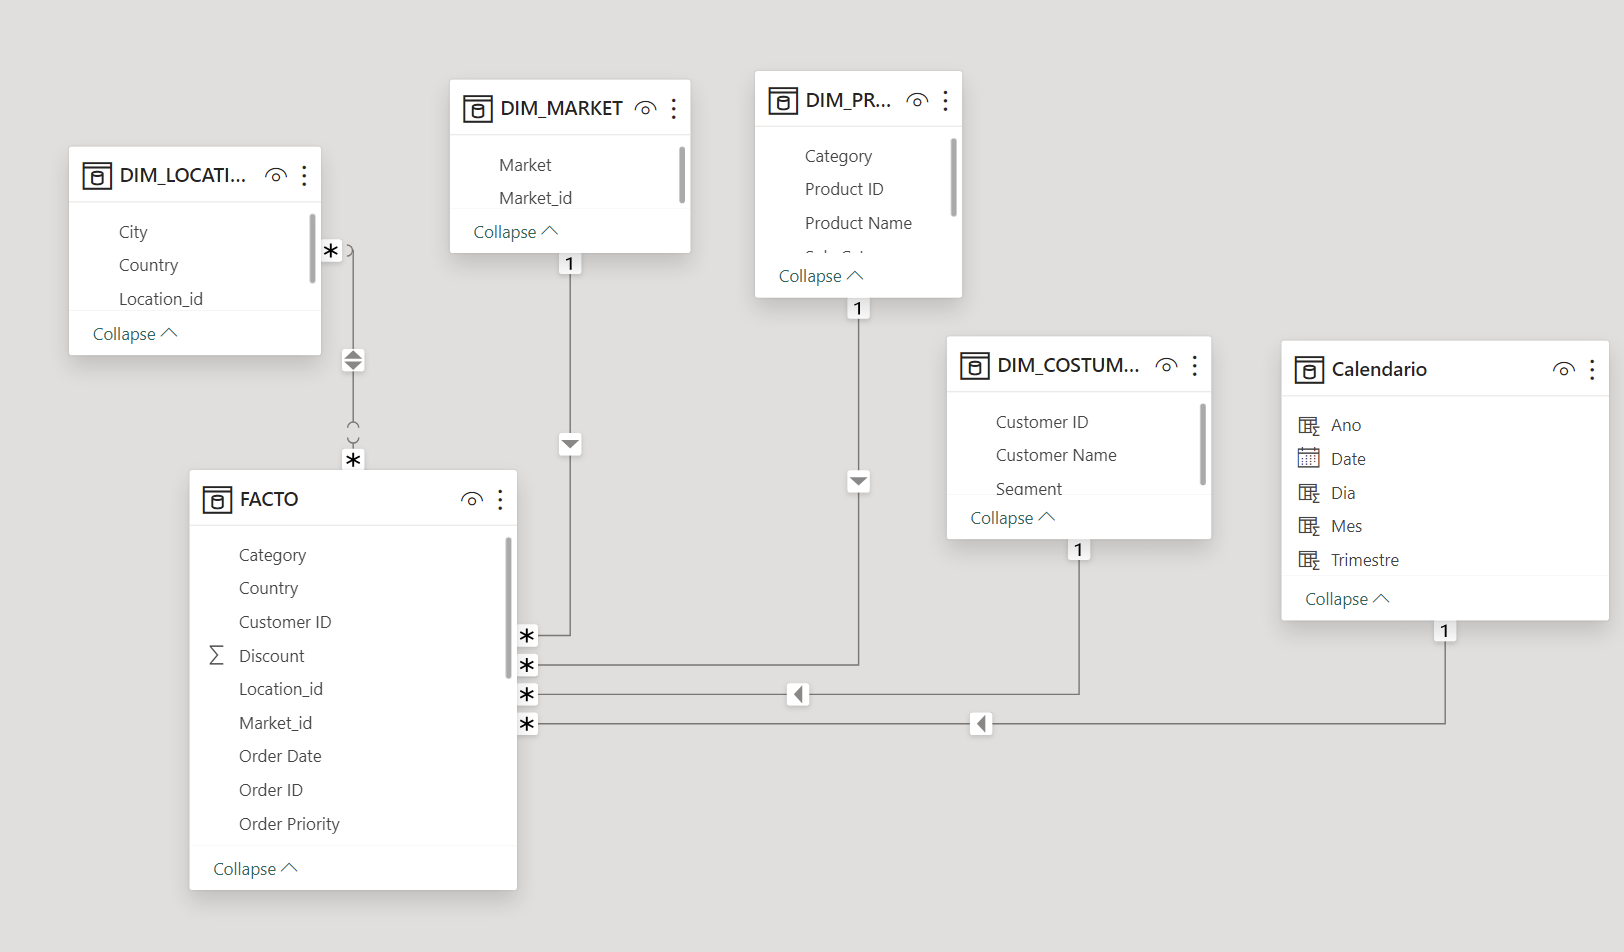

### Na imagem a seguir, apresentamos em resumo as fórmulas DAX que foram utilizadas no ambiente do PowerBI para criar a tabela Calendário e as colunas extra calculadas com base na tabela facto.
> As demais métricas estão presentes no dashboard em foram feitas utilizando apenas point and click.

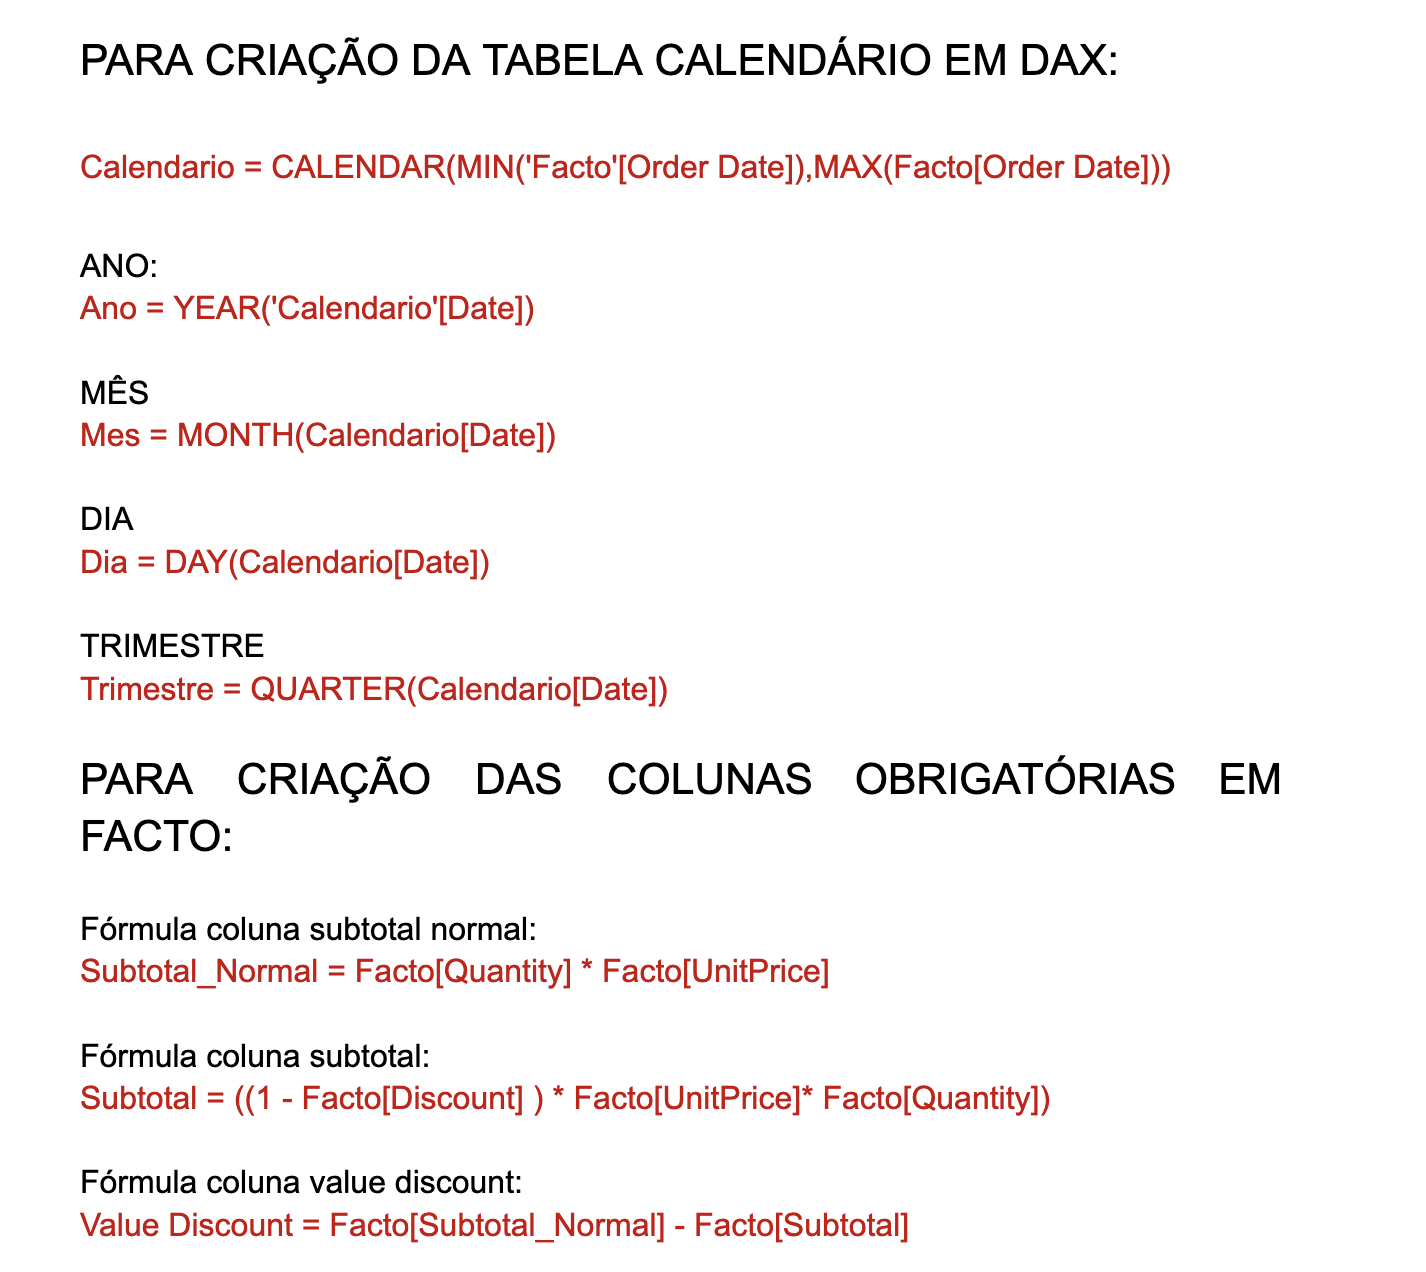